Liouvillian for the infinite range Ising evolving under Glauber dynamics

In [1]:
# C. Piermarocchi 2024
using LinearAlgebra
using Plots
using MathPhysicalConstants
using Random
using SparseArrays
using Arpack
using Expokit
using LaTeXStrings

In [2]:
function liouvill(NA,NB,JP,JM)
    MA= collect(-NA:2:NA) # possible values of MA ordered from negative to positive
    MB= collect(-NB:2:NB) # possible values of MB ordered from negative to positive
    N=NA+NB
    sLA= size(MA)[1] 
    sLB= size(MB)[1]
    sLT=sLA*sLB
    MMA=zeros(Int,sLT)
    MMB= zeros(Int,sLT)
    NPA=zeros(Int,sLT)
    NPB= zeros(Int,sLT)
    gM=zeros(Int,sLT)
    Liouv= zeros(sLT, sLT)
    for i= 1:sLA
        for j=1:sLB
            k= j + (i-1) * sLB
            MMA[k]=MA[i]
            MMB[k]=MB[j]
            NPA[k] = (NA + MMA[k])/ 2
            NPB[k]= (NB + MMB[k])/ 2
        end
    end

    # out terms
    for k= 1:sLT
        WPA= (1-tanh(2 *(JP * (MMA[k] - 1) - JM * MMB[k]) / N)) / 2 
        WPB= (1-tanh(2 *(JP * (MMB[k] - 1) + JM * MMA[k]) / N)) / 2 
        WMA=(1+tanh(2 *(JP * (MMA[k] + 1) - JM * MMB[k]) / N)) / 2 
        WMB= (1+tanh(2 *(JP * (MMB[k] + 1) + JM * MMA[k]) / N)) / 2 
        Liouv[k,k]=NPA[k] * WPA +  NPB[k] * WPB + (NA-NPA[k]) * WMA + (NB- NPB[k]) * WMB
    end

    #in terms in A
    for j = 1:sLB
        for i = 1:sLA-1 #  "in" terms from MA larger by 2; k'=k+sLB; + -> - flip
            k= j + (i-1) * sLB
            kp=k+sLB
            WPAP2= (1-tanh(2 *(JP * (MMA[kp]-1) - JM * MMB[kp]) / N)) / 2 
            Liouv[k,kp]= - NPA[kp] * WPAP2 
        end

        for i = 2:sLA # "in" terms from MA smaller by 2; k'=k-sLB, - -> + flip
            k= j + (i-1) * sLB
            kp=k-sLB
            WMAM2= (1+tanh(2 *(JP * (MMA[kp]+1) - JM * MMB[kp]) / N)) / 2 
            Liouv[k,kp]= -(NA-NPA[kp]) * WMAM2 
        end
    end

    #in terms in B
    for i = 1:sLA
        for j = 1:sLB-1 # i.e. "in" terms from MB larger by 2
            k= j + (i-1) * sLB
            kp= k+1
            WPBP2= (1-tanh(2 *(JP * (MMB[kp] - 1) + JM * MMA[kp]) / N)) / 2 
            Liouv[k,kp]= - NPB[kp] * WPBP2 
        end

        for j = 2:sLB # "in" terms from MB smaller by 2)
            k= j + (i-1) * sLB
            kp=k-1
            WMBM2= (1+tanh(2 *(JP * (MMB[kp] + 1) + JM * MMA[kp]) / N)) / 2 
            Liouv[k,kp]= - (NB-NPB[kp]) * WMBM2  
        end
    end
    return sparse(Liouv) # use Matrix(A) to go back to dense matrix
end

liouvill (generic function with 1 method)

In [18]:
function second_eval(NA,NB,JP,JM) # Important eigenvalue is the second one as the first is always 0
 return eigs(liouvill(NA, NB,JP,JM), nev=2, which=:SM, maxiter=10000)[1][2]
end

second_eval (generic function with 1 method)

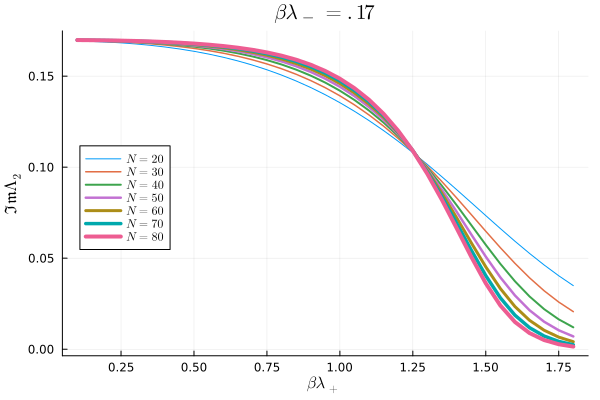

In [57]:
JP= 0.1:0.05:1.8
N=10
label_str = "N=$(N*2)"  # Standard Julia string interpolation
latex_label = L"$" * label_str * L"$"  # Convert to LaTeX string
plt=plot(JP, imag(second_eval.(N,N,JP,0.17))
    #./ JP
    , label=latex_label, xaxis=L"\beta \lambda_+",yaxis=L"\mathfrak{Im}\Lambda_2",
    title=L"\beta \lambda_-=.17"
    #,yscale=:log10
    ,legend=:left,
    linewidth=N*0.1) 
for N in 15:5:40
    label_str = "N=$(N*2)"  # Standard Julia string interpolation
    latex_label = L"$" * label_str * L"$"  # Convert to LaTeX string
    plt=plot!(JP, imag(second_eval.(N,N,JP,0.17)), 
            linewidth=N*0.1
        #./ JP
        ,label=latex_label
        #, yscale=:log10
        )
end
pltimg=plt

#plot(JP, real(second_eval.(20,20,JP,0.1)))
#plot!(JP, imag(second_eval.(20,20,JP,0.1)))

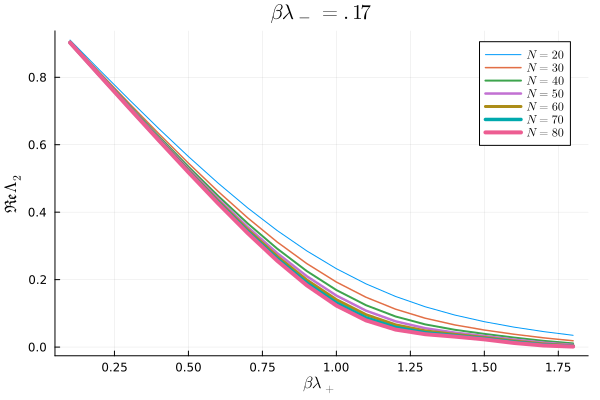

In [58]:
JP= 0.1:0.1:1.8
N=10
label_str = "N=$(N*2)"  # Standard Julia string interpolation
latex_label = L"$" * label_str * L"$"  # Convert to LaTeX string
plt=plot(JP, real(second_eval.(N,N,JP,0.17))
    #.* JP
    , label=latex_label, xaxis=L"\beta \lambda_+",yaxis=L"\mathfrak{Re} \Lambda_2",
    title=L"\beta \lambda_-=.17"
    #, yscale=:log10
    ,linewidth=N*0.1) 
for N in 15:5:40
    label_str = "N=$(N*2)"  # Standard Julia string interpolation
    latex_label = L"$" * label_str * L"$"  # Convert to LaTeX string
    plt=plot!(JP, real(second_eval.(N,N,JP,0.17))
        #.* JP
        , label=latex_label
        #, yscale=:log10
        ,linewidth=N*0.1
    )
end
pltreal=plt

#plot(JP, real(second_eval.(20,20,JP,0.1)))
#plot!(JP, imag(second_eval.(20,20,JP,0.1)))

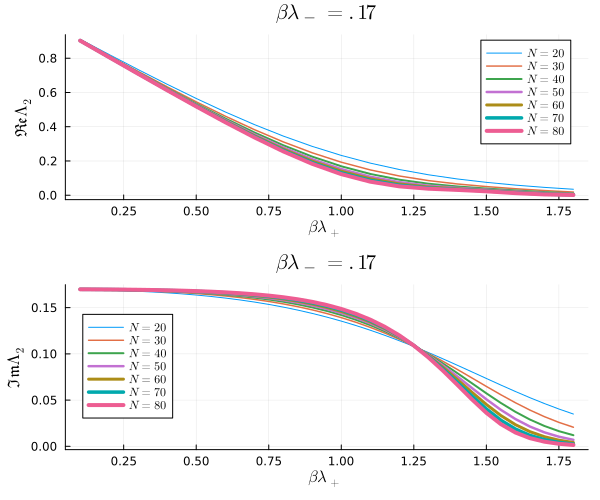

In [59]:
fig2=plot(pltreal,pltimg, layout=(2,1), size=(600,500) )

In [1]:
#savefig(fig2, "fig2_carlo.pdf")